## (一)競賽敘述與目標
本次競賽是給參賽者一組train data（8000筆）跟一組test data（2000筆），透過train data來做訓練，以預估test data的銀行客戶是否會流失

## (二)資料前處理
1.
文字敘述型的資料轉成數字表示，以利於分析，
Gender:
Male→0 、Female→1，
Geography:
S0→0 、 S1→1 、 S2→2，
但是經過後面的分析之後發現是否有將Geography的資料轉化成為數值表示並不會對結果產生顯著的影響，故捨棄

2.
留下train和test資料中對結果影響顯著的資料

3.
對剩下的資料作標準化，但是經過後面的分析之後發現並不會對結果產生顯著的影響，故捨棄

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
train_data=pd.read_csv('C:/Users/USER/Desktop/jupyter notebook/train.csv')
test_data=pd.read_csv('C:/Users/USER/Desktop/jupyter notebook/test.csv')
train_data.loc[train_data['Gender']=='Male', 'Gender']=0
test_data.loc[test_data['Gender']=='Male','Gender']=0
train_data.loc[train_data['Gender']=='Female', 'Gender']=0
test_data.loc[test_data['Gender']=='Female','Gender']=1
train_data1=pd.get_dummies(train_data,columns=['Geography'])
test_data1=pd.get_dummies(test_data,columns=['Geography'])
train_data1.head(8)

,Unnamed: 0,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_S0,Geography_S1,Geography_S2
0,0,551,15806307,S2336,720,0,38,5,114051.97,2,0,1,107577.29,0,0,0,1
1,1,6897,15709621,S1500,682,0,54,4,62397.41,1,1,0,113088.60,1,1,0,0
2,2,4588,15619340,S1865,672,0,31,5,119903.67,1,1,1,132925.17,0,1,0,0
3,3,291,15620746,S1672,592,0,40,4,104257.86,1,1,0,110857.33,0,0,0,1
4,4,1673,15646372,S2532,753,0,42,5,120387.73,1,0,1,126378.57,0,0,0,1
5,5,648,15649129,S1548,575,0,42,5,104472.90,1,1,1,71641.38,0,1,0,0
6,6,6113,15729557,S37,572,0,37,6,135715.66,1,1,0,115928.95,0,1,0,0
7,7,8957,15579112,S750,753,0,34,6,124281.61,1,1,0,89136.06,0,0,1,0


In [15]:
X=train_data[['RowNumber','CustomerId','CreditScore','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
y=np.array(train_data['Exited'])
X_TEST=test_data[['RowNumber','CustomerId','CreditScore','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
print(X.shape)
print(y.shape)
print(X_TEST.shape)

(8000, 11)
(8000,)
(2000, 11)


In [16]:
X=train_data1[['RowNumber','CustomerId','CreditScore','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Geography_S0','Geography_S1','Geography_S2']]
y=np.array(train_data1['Exited'])
X_TEST=test_data1[['RowNumber','CustomerId','CreditScore','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Geography_S0','Geography_S1','Geography_S2']]
print(X.shape)
print(y.shape)
print(X_TEST.shape)

(8000, 14)
(8000,)
(2000, 14)


In [17]:
# from sklearn.cluster import DBSCAN 
# outlier_detection = DBSCAN( eps = 0.5, metric="euclidean", min_samples = 3, n_jobs = -1) 
# clusters = outlier_detection.fit_predict(credit_EstimatedSalary) 
# print(-1 in clusters)



In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=123)
print(X_train.shape)

(6000, 14)


In [100]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
pd.DataFrame(X_train)

c:\python37\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\python37\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
c:\python37\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\python37\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.706762,0.368730,0.294462,-0.918015,-1.455309,0.325599,1.319972,-0.918419,-1.567869,-1.042920,0.831273,0.998668,-0.588385,-0.565289
1,-1.716165,0.507565,-1.275071,-0.918015,2.668447,1.111436,0.440776,0.800394,0.637808,0.958846,0.939935,0.998668,-0.588385,-0.565289
2,0.374388,0.051239,1.425200,-0.918015,0.673081,1.111436,1.715706,-0.918419,-1.567869,-1.042920,0.683423,-1.001334,-0.588385,1.769007
3,-1.218994,-1.415308,-2.203289,1.089307,2.535423,1.111436,-1.217593,-0.918419,0.637808,-1.042920,-0.600059,0.998668,-0.588385,-0.565289
4,-1.303826,-0.405184,-1.072550,-0.918015,0.140984,1.111436,0.310798,2.519206,0.637808,0.958846,0.551893,-1.001334,1.699567,-0.565289
5,1.361081,-1.361148,-0.464989,1.089307,-0.125065,-0.460239,0.968768,-0.918419,-1.567869,-1.042920,1.407998,-1.001334,1.699567,-0.565289
6,-0.768759,0.297490,-1.275071,1.089307,-0.790187,0.325599,-1.217593,0.800394,0.637808,0.958846,1.317609,0.998668,-0.588385,-0.565289
7,-0.223261,-1.661225,1.948378,1.089307,1.205179,-1.246076,0.194329,-0.918419,-1.567869,0.958846,-1.102243,-1.001334,1.699567,-0.565289
8,0.177257,-1.489357,-0.414359,1.089307,-1.189260,0.325599,0.795706,-0.918419,0.637808,-1.042920,1.725064,0.998668,-0.588385,-0.565289
9,-0.479495,1.307057,-2.355179,1.089307,-1.588333,0.325599,1.511190,0.800394,-1.567869,0.958846,0.632916,-1.001334,-0.588385,1.769007


## (三)特徵處理與分析
Accuracy=所有預測出會離開（1）、不會離開（0）的正確率

Precision=測試資料預估為1中真的為1的比例

Recall =測試資料中答案為1中正確分類為1的比例

fScore =(2xPrecisionxRecall)/(Precision+Recall)

final = 30%Accuracy+30%Precision+40%fScore

我們令多個方程式計算這些數值，以觀察資料及分析1、0的正確率是否接近完美。

In [8]:
def final(a,b,c):
    final=(a*0.3)+(b*0.3)+(c*0.4)
    return final

In [9]:
def classifier(test,pred):
    TP,FP,FN,TN=0,0,0,0
    for i in range(len(test)):
        if pred[i]==1 and test[i]==1:
            TP+=1
        elif pred[i]==1 and test[i]!=1:
            FP+=1
        elif pred[i]!=1 and test[i]==1:
            FN+=1
        elif pred[i]!=1 and test[i]!=1:
            TN+=1
    return TP,FP,FN,TN

In [10]:
def precision_recall_fscore(a):
    precision=a[0]/(a[0]+a[1])
    recall=a[0]/(a[0]+a[2])
    fscore=2*precision*recall/(precision+recall)
    return precision,recall,fscore

In [ ]:
## (四)預測訓練模型

KNeighborsClassifier、PCA、GaussianNB、AdaBoostClassifier、BaggingClassifier、ExtraTreesClassifier、GradientBoostingClassifier、RidgeClassifierCV、RandomForestClassifier、Decision tree

## ◆KNeighborsClassifier
###    n=26,accuracy=0.7885,precision=1.0,recall=0.047,fscore=0.097,final=0.54

In [2]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.model_selection import 
knn=KNeighborsClassifier(n_neighbors=6)
print(type(knn))
knn.fit(X_train,y_train)
pre1=knn.predict(X_test)
accuracy=knn.score(X_test,y_test)
print(accuracy)
right=classifier(y_test,pre1)
ans=precision_recall_fscore(right)
print(ans)
s=final(accuracy,ans[0],ans[2])
s

<class 'sklearn.neighbors.classification.KNeighborsClassifier'>


NameError: name 'X_train' is not defined

In [3]:
knn=KNeighborsClassifier(n_neighbors=20)
print(type(knn))
knn.fit(X_train,y_train)
pre1=knn.predict(X_test)
accuracy=knn.score(X_test,y_test)
print(accuracy)
right=classifier(y_test,pre1)
ans=precision_recall_fscore(right)
print(ans)
s=final(accuracy,ans[0],ans[2])
s

<class 'sklearn.neighbors.classification.KNeighborsClassifier'>


NameError: name 'X_train' is not defined

 本來想嘗試如果降到一維做看結果如何，結果非常差

In [ ]:
knn1=KNeighborsClassifier(n_neighbors=28)
knn1.fit(pd.DataFrame(X_train['CreditScore']),y_train)
pre=knn1.predict(pd.DataFrame(X_test['CreditScore']))
print(pre[:100])
print(y_test)
accuracy=knn1.score(pd.DataFrame(X_test['CreditScore']),y_test)
print(accuracy)
right=classifier(y_test,pre)
ans=precision_recall_fscore(right)
print(ans)
s=final(accuracy,ans[0],ans[2])
s

## ◆GaussianNB
### var_smoothing=0, accuracy:0.817,precision=0.718,recall=0.228,fscore=0.346,final=0.5992

In [50]:
from sklearn.naive_bayes import GaussianNB
gau=GaussianNB(var_smoothing = 0)
gau.fit(X_train,y_train)
pre2=gau.predict(X_test)
gau_proba=gau.predict_proba(X_test)
print('0: ',gau_proba[:,0].mean())
print('1: ',gau_proba[:,1].mean())
# print(pre1[:50])
# print(np.array(y_test[:50]))
accuracy=gau.score(X_test,y_test)
print(accuracy)
right=classifier(y_test,pre2)
ans=precision_recall_fscore(right)
print(ans)
s=final(accuracy,ans[0],ans[2])
s

0:  0.7896085611498915
1:  0.2103914388501084
0.8075
(0.5757575757575758, 0.35764705882352943, 0.4412191582002903)


0.5914649360073888

In [11]:
gau1=GaussianNB(var_smoothing = 0 )
pre2=gau.predict(X_TEST)


## ☆AdaBoostClassifier
### n_estimators=200,learning_rate=0.2,accuracy=0.859,precision=0.78,recall=0.466,fscore=0.584,final=0.726
### n_estimator=100,learning_rate=0.5,accuracy=0.858,precision=0.77,recall=0.47,fscore=0.584,final=0.72

In [51]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,learning_rate=0.2,random_state=123)
ada.fit(X_train,y_train)
pre3=ada.predict(X_test)
ada_tproba=ada.predict_proba(X_test)
print(ada_tproba)
print(pre3[:50])
print(np.array(y_test[0:50]))
accuracy=ada.score(X_test,y_test)
print(accuracy)
right=classifier(y_test,pre3)
ans=precision_recall_fscore(right)
print(ans)
s=final(accuracy,ans[0],ans[2])
s

[[0.52313472 0.47686528]
 [0.51438893 0.48561107]
 [0.51365333 0.48634667]
 ...
 [0.50583282 0.49416718]
 [0.50912325 0.49087675]
 [0.49540073 0.50459927]]
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0]
0.8585
(0.77734375, 0.4682352941176471, 0.5844346549192364)


0.7245269869676946

In [14]:
ada.fit(X,y)
ada_proba=ada.predict_proba(X_TEST)

## ☆BaggingClassifier
### n_estimators=500,accuracy=0.8605,precision=0.789,recall=0.468,fscore=0.587,final=0.682(NO)

In [52]:
cl3

[[0.938 0.062]
 [0.99  0.01 ]
 [0.984 0.016]
 ...
 [0.84  0.16 ]
 [0.704 0.296]
 [0.626 0.374]]
0.863
(0.7785977859778598, 0.4964705882352941, 0.6063218390804598)


0.6910675710874755

In [16]:
bag.fit(X,y)
bag_proba=bag.predict_proba(X_TEST)

## ☆ExtraTreesClassifier
### n_estimators=600,random_state=1234,accuracy=0.8585,precision=0.825,recall=0.4235,fscore=0.5598,final=0.729

In [17]:
from sklearn.ensemble import ExtraTreesClassifier
extra=ExtraTreesClassifier(n_estimators=600,random_state=123)
extra.fit(X_train,y_train)
pre5=extra.predict(X_test)
tree_tproba=extra.predict_proba(X_test)
print(tree_tproba)
accuracy=extra.score(X_test,y_test)
print(accuracy)
right=classifier(y_test,pre5)
ans=precision_recall_fscore(right)
print(ans)
s=final(accuracy,ans[0],ans[2])
s

[[0.98166667 0.01833333]
 [0.93333333 0.06666667]
 [0.905      0.095     ]
 ...
 [0.68833333 0.31166667]
 [0.75       0.25      ]
 [0.52166667 0.47833333]]
0.8525
(0.825, 0.38823529411764707, 0.528)


0.71445

In [18]:
extra.fit(X,y)
tree_proba=extra.predict_proba(X_TEST)

## ☆GradientBoostingClassifier
### n_estimators=200,learn_rate=0.02,random_state=1234,accuracy=0.8635,precision=0.85,recall=0.435,
### fscore=0.575,final=0.743

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=200,learning_rate=0.02,random_state=1234)
grad.fit(X_train,y_train)
pre6=grad.predict(X_test)
boost_tproba=grad.predict_proba(X_test)
print(boost_tproba)
accuracy=grad.score(X_test,y_test)
print(accuracy)
right=classifier(y_test,pre6)
ans=precision_recall_fscore(right)
print(ans)
s=final(accuracy,ans[0],ans[2])
s

[[0.9536196  0.0463804 ]
 [0.87455456 0.12544544]
 [0.86545789 0.13454211]
 ...
 [0.72978384 0.27021616]
 [0.8297544  0.1702456 ]
 [0.22425844 0.77574156]]
0.864
(0.8525345622119815, 0.43529411764705883, 0.5763239875389408)


0.7454899636791708

In [20]:
grad.fit(X,y)
boost_proba=grad.predict_proba(X_TEST)

## ◆RidgeClassifierCV
覺得沒有明顯幫助，故不採用

In [ ]:
from sklearn.linear_model import RidgeClassifierCV
rid= RidgeClassifierCV()
rid.fit(X_train,y_train)
pre1=rid.predict(X_test)
accuracy=rid.score(X_test,y_test)
print(accuracy)
right=classifier(y_test,pre1)
ans=precision_recall_fscore(right)
s=final(accuracy,ans[0],ans[2])
s

## ◆RandomForestClassifier

In [ ]:
random_=RandomForestClassifier(n_estimators=200,random_state=123)
random_.fit(X_train,y_train)
pre6=random_.predict(X_test)
accuracy=random_.score(X_test,y_test)
print(accuracy)
a=np.array(y_test)
d=a.ravel()
right=classifier(d,pre6) 


## Decision tree
覺得沒有明顯幫助，故不採用

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(min_samples_split=1.5,random_state=5432)
dtree.fit(X_train,y_train)
pre=dtree.predict(X_test)
accuracy=dtree.score(X_test,y_test)
print(accuracy)
right=classifier(y_test,pre)
ans=precision_recall_fscore(right)
print(ans)
s=final(accuracy,ans[0],ans[2])
print(s)
from sklearn.metrics import classification_report
ss= classification_report(y_test,pre)
ss 

In [102]:
dtree.fit(X,y)
pre2=dtree.predict(X_TEST)

## test

In [21]:
pre_tproba=((boost_tproba*4)+(ada_tproba*1)+(tree_tproba*0)+(bag_tproba*0))/3
# print(boost_tproba[:50],ada_tproba[:50])
# print(pre_tproba[:50])
print('ada:  ',pre3[60:70],ada_tproba[61])
print('boo:  ',pre6[60:70],boost_tproba[61])
print('tree: ',pre5[60:70])
print('bag:  ',pre4[60:70])
pre1=[]
for i in range(len(pre_tproba)):
    if pre_tproba[i][0]>pre_tproba[i][1]:
        pre1.append(0)
    else:
        pre1.append(1)
pre1=np.array(pre1)
print('this: ',pre1[60:70],pre_tproba[61])
print('real: ',y_test[60:70])
right=classifier(y_test,pre1)
accuracy=(right[0]+right[3])/sum(right)
print(accuracy)
ans=precision_recall_fscore(right)
s=final(accuracy,ans[0],ans[2])
s
#0.7454899636791708
#0.7454899636791708

ada:   [0 1 1 0 0 1 0 0 0 0] [0.4994692 0.5005308]
boo:   [0 0 1 0 0 1 0 0 0 1] [0.59615704 0.40384296]
tree:  [0 0 1 0 0 1 0 0 0 1]
bag:   [0 0 1 0 0 1 0 0 0 1]
this:  [0 0 1 0 0 1 0 0 0 1] [0.96136579 0.70530088]
real:  [0 1 1 0 0 1 0 0 0 1]
0.864


0.7454899636791708

### ada,bagging,extratrees,boosting

In [22]:
##boost>ada>trees>bagging
pre_proba=((boost_proba*2)+(ada_proba*1)+(tree_proba*0)+(bag_proba*0))/3
pre2=[]
for i in range(len(pre_proba)):
    if pre_proba[i][0]>pre_proba[i][1]:
        pre2.append(0)
    else:
        pre2.append(1)
pre2[:20]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

# 輸出結果

In [103]:
anss=pd.DataFrame({'RowNumber':X_TEST['RowNumber'],'Exited':pre2})
anss.index=range(len(anss))
anss.to_csv('upload.csv',columns=['RowNumber','Exited'])

## (六)預測結果分析
我們將原本的traindata 再分成train 和 test ，再針對準確率看起來比較高的package，進行不同的參數做test的預測，觀察最好的結果是發生在哪段參數的範圍

### AdaBoostClassifier
當時我們在作時並沒有畫圖分析，就是徒手改參數，現在畫出來發現大概在400時，final score 才會是最好的，而我們卻只設參數到200

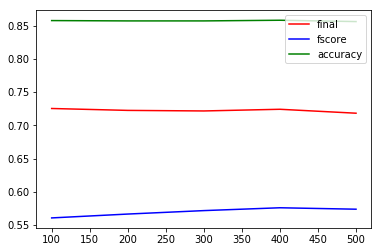

In [11]:
n_est=[100,200,300,400,500]
s=[]
fs=[]
acc=[]
for n in n_est:
    ada=AdaBoostClassifier(n_estimators=n,learning_rate=0.2,random_state=123)
    ada.fit(X_train,y_train)
    pre1=ada.predict(X_test)
    accuracy=ada.score(X_test,y_test)
    right=classifier(y_test,pre1)
    ans=precision_recall_fscore(right)
    ss=final(accuracy,ans[0],ans[2])
    acc+=[accuracy]
    fs+=[ans[2]]
    s+=[ss]
plt.plot(n_est,s,c='red',label='final')
plt.plot(n_est,fs,c='blue',label='fscore')
plt.plot(n_est,acc,c='green',label='accuracy')
plt.legend()

### BaggingClassifier
我們當時設參數500，但現在畫圖發現設在600~700可能會更好

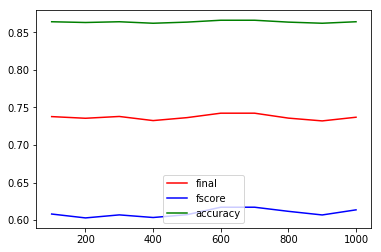

In [12]:
from sklearn.ensemble import BaggingClassifier
b=[100,200,300,400,500,600,700,800,900,1000]
s=[]
fs=[]
acc=[]
for bb in b:
    bag=BaggingClassifier(n_estimators=bb,random_state=123)
    bag.fit(X_train,y_train)
    pre1=bag.predict(X_test)
    accuracy=bag.score(X_test,y_test)
    right=classifier(y_test,pre1)
    ans=precision_recall_fscore(right)
    ss=final(accuracy,ans[0],ans[2])
    acc+=[accuracy]
    fs+=[ans[2]]
    s+=[ss]
plt.plot(b,s,c='red',label='final')
plt.plot(b,fs,c='blue',label='fscore')
plt.plot(b,acc,c='green',label='accuracy')
plt.legend()

### ExtraTreesClassifier


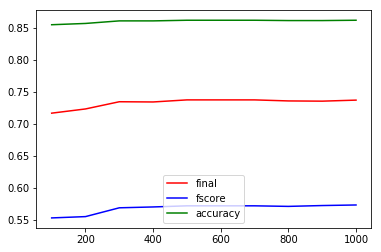

In [19]:
from sklearn.ensemble import ExtraTreesClassifier
e=[100,200,300,400,500,600,700,800,900,1000]
s=[]
fs=[]
acc=[]
for ee in e:
    extra=ExtraTreesClassifier(n_estimators=ee,random_state=123)
    extra.fit(X_train,y_train)
    pre1=extra.predict(X_test)
    accuracy=extra.score(X_test,y_test)
    right=classifier(y_test,pre1)
    ans=precision_recall_fscore(right)
    ss=final(accuracy,ans[0],ans[2])
    acc+=[accuracy]
    fs+=[ans[2]]
    s+=[ss]
plt.plot(e,s,c='red',label='final')
plt.plot(e,fs,c='blue',label='fscore')
plt.plot(e,acc,c='green',label='accuracy')
plt.legend()

### GradientBoostingClassifier
我們剛好設在200，也就是fscore的轉折點，之後的fscore和final就都差不多

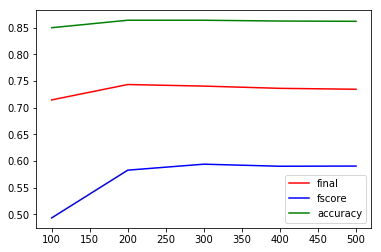

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
g=[100,200,300,400,500]
s=[]
fs=[]
acc=[]
for gg in g:
    grad=GradientBoostingClassifier(n_estimators=gg,learning_rate=0.02,random_state=1234)
    grad.fit(X_train,y_train)
    pre1=grad.predict(X_test)
    accuracy=grad.score(X_test,y_test)
    right=classifier(y_test,pre1)
    ans=precision_recall_fscore(right)
    ss=final(accuracy,ans[0],ans[2])
    acc+=[accuracy]
    fs+=[ans[2]]
    s+=[ss]
plt.plot(g,s,c='red',label='final')
plt.plot(g,fs,c='blue',label='fscore')
plt.plot(g,acc,c='green',label='accuracy')
plt.legend()

我們最後是使用加成機率的方式，但當時選的是以維最高的AdaBoostClassifier 和 GradientBoostingClassifier，但畫出圖表後發現
BaggingClassifier 和 ExtraTreesClassifier 好像其實比 AdaBoostClassifier 更接近0.75，使用他們和GradientBoostingClassifier 搞不好準確率會高一些